/Users/divu/Desktop/BINF5507_Assignment1-1/BINF5507_Assignment-1/Scripts/data_preprocessor.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


Accuracy: 0.75


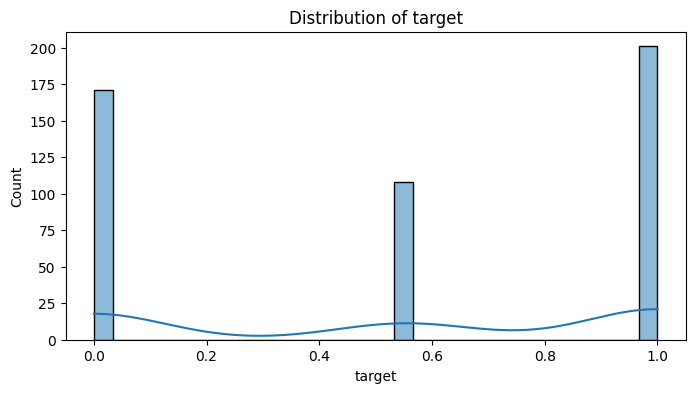

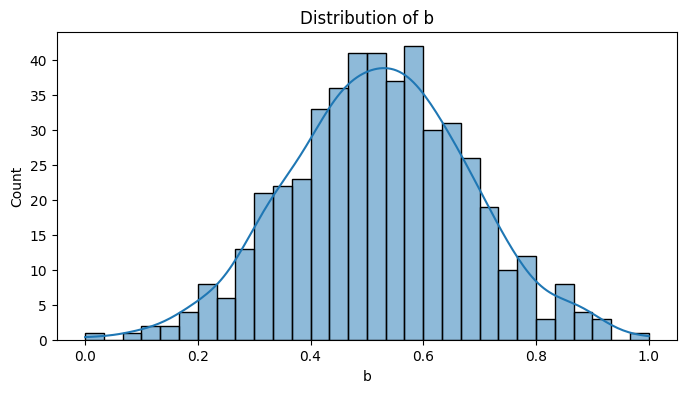

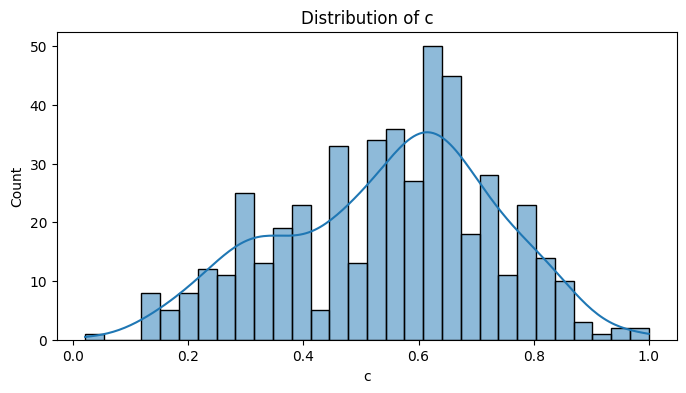

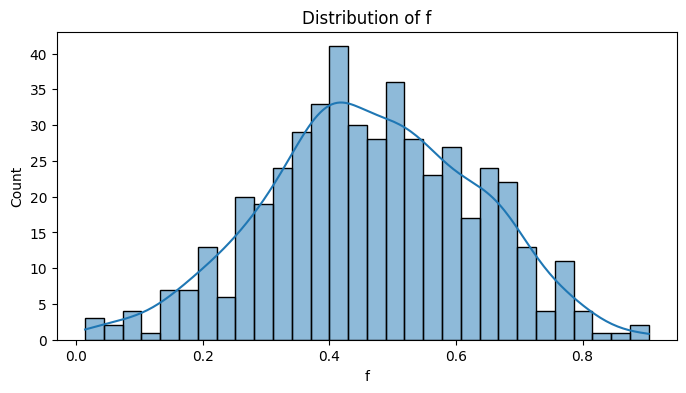

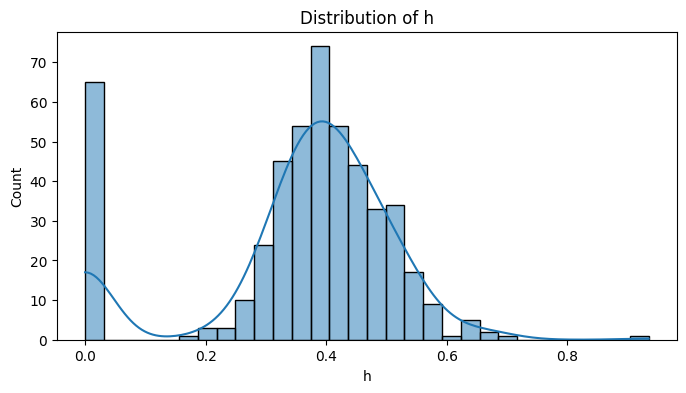

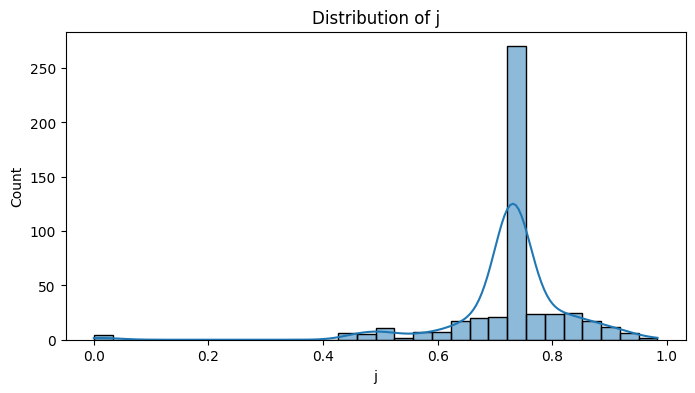

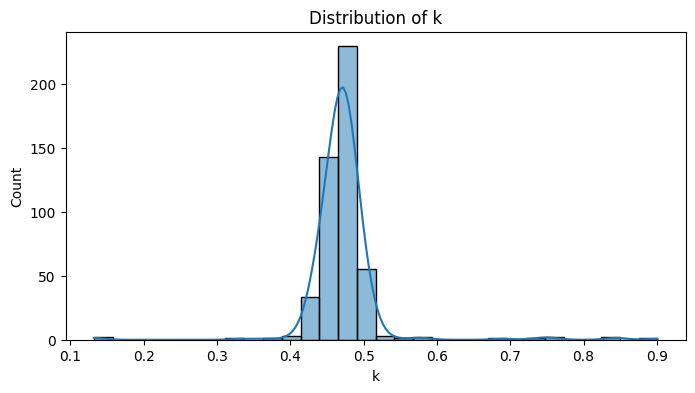

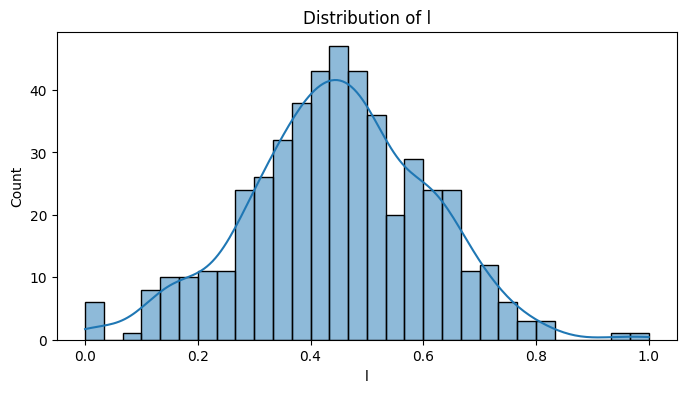

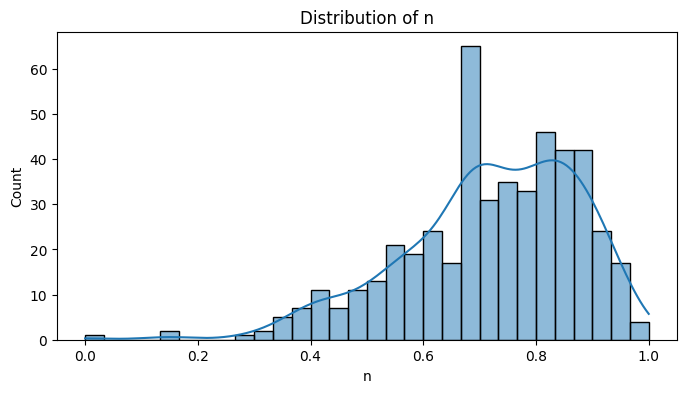

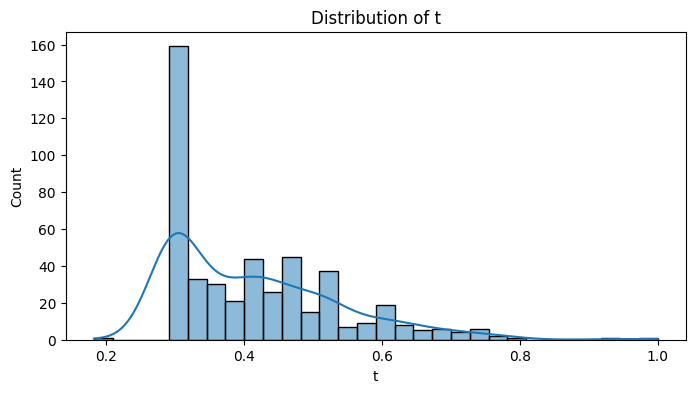

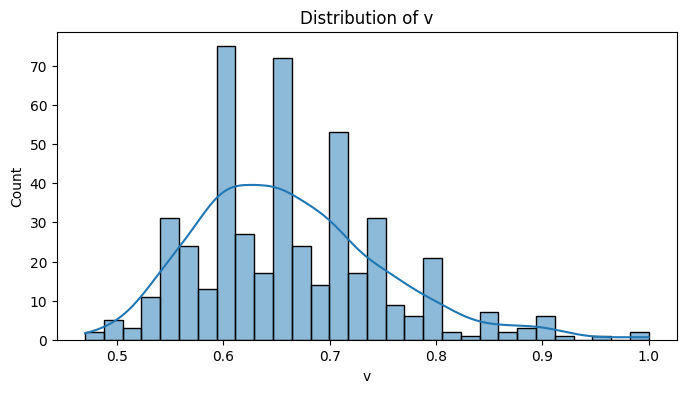

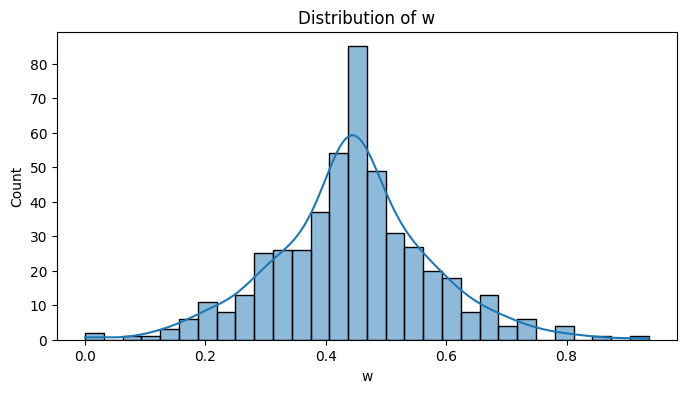

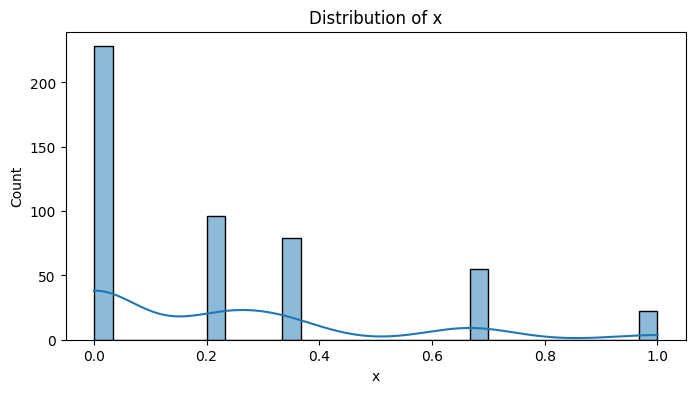

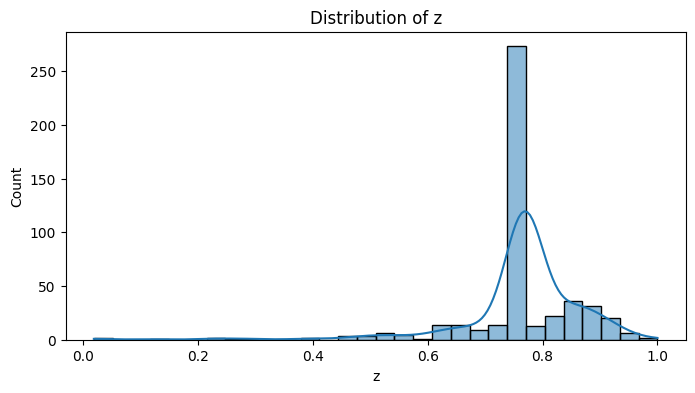

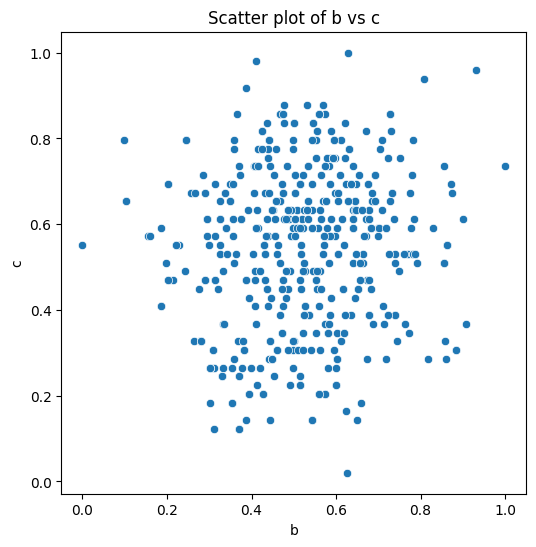

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from data_preprocessor import simple_model

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

# 2. Preprocess the data
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.normalize_data(clean_data)
clean_data = dp.remove_redundant_features(clean_data)

# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)
# 4. Load the cleaned dataset
clean_data = pd.read_csv('../Data/clean_data.csv')
# 4. Train and evaluate the model
dp.simple_model(clean_data)

# 5. Visualize the data
# Install necessary libraries for visualization
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution 
numeric_cols = clean_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(clean_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Scatter plot of two numeric columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=clean_data[numeric_cols[1]], y=clean_data[numeric_cols[2]])
    plt.title(f'Scatter plot of {numeric_cols[1]} vs {numeric_cols[2]}')
    plt.show()


